# Star Wars Survey

Over the years, many [Star Wars movies](https://en.wikipedia.org/wiki/List_of_Star_Wars_films) have been released, and have become incredibly popular. The first movies were Episodes IV, V and VI, together forming 'the first trilogy', followed by Episodes I, II and III (the second trilogy). While waiting for [Episode VII: The Force Awakens](https://en.wikipedia.org/wiki/Star_Wars:_The_Force_Awakens) to come out, the team at [FiveThirtyEight](https://fivethirtyeight.com/), an American website that focuses on opinion poll analysis, politics, economics, and sports blogging, became interested in answering some questions about Star Wars fans. In particular, they wondered: *does the rest of America realize that 'Episode V: The Empire Strikes Back' is clearly the best of the bunch?*

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. Questions being asked included 'Which Star Wars films have you seen?' and 'Please rank the Star Wars films in your order of preference'. They received around one thousand responses, which you can download from [their GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

In this study we will do an analysis of the responses that were collected. Not only will we answer 538's question, also we will take a deeper look at the popularity of the episodes, both in terms of rankings and in terms of how many watched them. We will also take a look till what extent that's the same for men and women alike. 

We'll start with doing some initial data exploration. Then we will clean the data, including some reformatting to make analysis easier. This will be followed by the actual analysis of the cleaned data. Several graphs will show the analysis results. Main observations are below those graphs and are also summarized at the end.

## Initial data exploration

In this section we will read in the data, take a look at a sample, check how many records we have, and provide a small data dictionary of some interesting columns.

In [227]:
# Import libraries. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Enable plotting inline.
%matplotlib inline

In [228]:
# Read in the data
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [229]:
# Show a sample of the data
pd.set_option("display.max_columns", None)
star_wars.head(5)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,2.0,1.0,4.0,5.0,6.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,2.0,3.0,4.0,5.0,6.0,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,6.0,1.0,2.0,4.0,3.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,4.0,6.0,2.0,1.0,3.0,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [230]:
# Check the number of rows and columns
star_wars.shape

(1186, 38)

In [231]:
# List the column names
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [232]:
# Make Markdown tables appear at the left

In [233]:
%%html
<style>
table {float:left}
</style>

So it seems we have over one thousand records. The column names are not all that logical (in fact, many of them are unnamed), and may contain even full movie names as data. For our understanding and for our next steps, let's show a small data dictionary of a subset of (interesting) columns, and how they seem to be filled:


Column name| What does it (appear to) contain
:------ | :------
Have you seen any of the 6 films in the... | Contains 'Yes' or 'No' (and possibly 'NaN')
Do you consider yourself to be a fan... | Contains 'Yes' or 'No' (and possibly 'NaN')
Which of the following Star Wars films have you seen? Please... | Contains the name of Episode I in case it was seen. Else contains 'NaN'   
Unnamed: 4 | Contains the name of Episode II in case it was seen. Else contains 'NaN'   
Unnamed: 5 | Contains the name of Episode III in case it was seen. Else contains 'NaN'   
Unnamed: 6 | Contains the name of Episode IV in case it was seen. Else contains 'NaN'      
Unnamed: 7 | Contains the name of Episode V in case it was seen. Else contains 'NaN'      
Unnamed: 8 | Contains the name of Episode VI in case it was seen. Else contains 'NaN'
Please rank the Star Wars films in order of preference... | Contains preference value (1.0 ... 6.0) for Episode I. Or 'NaN'
Unnamed: 10 | Contains preference value (1.0 ... 6.0) for Episode II. Or 'NaN'
Unnamed: 11 | Contains preference value (1.0 ... 6.0) for Episode III. Or 'NaN'
Unnamed: 12 | Contains preference value (1.0 ... 6.0) for Episode IV. Or 'NaN'
Unnamed: 13 | Contains preference value (1.0 ... 6.0) for Episode V. Or 'NaN'
Unnamed: 14 | Contains preference value (1.0 ... 6.0) for Episode VI. Or 'NaN'

## Data cleaning

Given what we saw in the previous section, let's proceed with cleaning and reformatting some of the data, to make analysis easier. 

### Cleaning the two columns with initial questions
Let's rename the first two columns. And given that they are yes/no questions, let's convert the answers to Booleans.

In [234]:
# First rename the columns to something readable
updated_column_names = {'Have you seen any of the 6 films in the Star Wars franchise?': 'saw_any',
                        'Do you consider yourself to be a fan of the Star Wars film franchise?': 'is_fan' }
                        
star_wars = star_wars.rename (columns = updated_column_names)

In [235]:
# Check existing values for 'saw_any' (fka 'Have you seen....') column
star_wars['saw_any'].value_counts(dropna = False)

Yes    936
No     250
Name: saw_any, dtype: int64

In [236]:
# Check existing values for 'is_fan' (fka 'Do you consider...') column
star_wars['is_fan'].value_counts(dropna = False)

Yes    552
NaN    350
No     284
Name: is_fan, dtype: int64

In [237]:
# Create mapping dictionary to convert to Booleans
map_yes_no = {'Yes': True, 'No': False}

# Apply map to both columns
star_wars['saw_any'] = star_wars['saw_any'].map(map_yes_no)
star_wars['is_fan'] = star_wars['is_fan'].map(map_yes_no)

In [238]:
# Check result: new existing values for 'saw_any' column
star_wars['saw_any'].value_counts(dropna = False)

True     936
False    250
Name: saw_any, dtype: int64

In [239]:
# Check result: new existing values for 'is_fan' column
star_wars['is_fan'].value_counts(dropna = False)

True     552
NaN      350
False    284
Name: is_fan, dtype: int64

### Cleaning the six 'Which have you seen' columns 
Let's rename these six columns. And given that they are yes/no questions, let's convert the answers to Booleans.

In [240]:
# First rename the columns to something readable
updated_column_names = {'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1',
                        'Unnamed: 4': 'seen_2',
                        'Unnamed: 5': 'seen_3',
                        'Unnamed: 6': 'seen_4',
                        'Unnamed: 7': 'seen_5',
                        'Unnamed: 8': 'seen_6'}
star_wars = star_wars.rename (columns = updated_column_names)

In [241]:
# Check for all 6 columns what data is in
for entry in range (1,7):
    my_column_name = 'seen_{}'.format(entry)
    print ('value_counts in', my_column_name)
    print (star_wars[my_column_name].value_counts(dropna = False))

value_counts in seen_1
Star Wars: Episode I  The Phantom Menace    673
NaN                                         513
Name: seen_1, dtype: int64
value_counts in seen_2
NaN                                            615
Star Wars: Episode II  Attack of the Clones    571
Name: seen_2, dtype: int64
value_counts in seen_3
NaN                                            636
Star Wars: Episode III  Revenge of the Sith    550
Name: seen_3, dtype: int64
value_counts in seen_4
Star Wars: Episode IV  A New Hope    607
NaN                                  579
Name: seen_4, dtype: int64
value_counts in seen_5
Star Wars: Episode V The Empire Strikes Back    758
NaN                                             428
Name: seen_5, dtype: int64
value_counts in seen_6
Star Wars: Episode VI Return of the Jedi    738
NaN                                         448
Name: seen_6, dtype: int64


In [242]:
# Before replacing the data in the columns, let's capture the precise movie names. It may come in handy later.
# Since the spelling is consistent, we can just take those from the first row in the dataframe.
# We'll put these names in a dictionary. 
# In the same loop, let's also create a mapping dictionary already.

six_movies = {}
map_movie_seen = {}
for entry in range (1,7):
    my_column_name = 'seen_{}'.format(entry)
    my_movie_name = star_wars.iloc[0, entry+2]
    six_movies[entry] = my_movie_name
    map_movie_seen[my_movie_name] = True

# For the mapping dictionary, also add an entry to replace NaN with False
map_movie_seen[np.nan] = False

In [243]:
# Show dictionary with all 6 movies
six_movies

{1: 'Star Wars: Episode I  The Phantom Menace',
 2: 'Star Wars: Episode II  Attack of the Clones',
 3: 'Star Wars: Episode III  Revenge of the Sith',
 4: 'Star Wars: Episode IV  A New Hope',
 5: 'Star Wars: Episode V The Empire Strikes Back',
 6: 'Star Wars: Episode VI Return of the Jedi'}

In [244]:
# Show mapping dictionary
map_movie_seen

{'Star Wars: Episode I  The Phantom Menace': True,
 'Star Wars: Episode II  Attack of the Clones': True,
 'Star Wars: Episode III  Revenge of the Sith': True,
 'Star Wars: Episode IV  A New Hope': True,
 'Star Wars: Episode V The Empire Strikes Back': True,
 'Star Wars: Episode VI Return of the Jedi': True,
 nan: False}

In [245]:
# Apply the mapping dictionary to the six 'seen' columns
for entry in range (1,7):
    my_column_name = 'seen_{}'.format(entry)
    star_wars[my_column_name]=star_wars[my_column_name].map(map_movie_seen)

In [246]:
# Check the result (by comparing this output with what we had  above)
for entry in range (1,7):
    my_column_name = 'seen_{}'.format(entry)
    print ('value_counts in', my_column_name)
    print (star_wars[my_column_name].value_counts(dropna = False))

value_counts in seen_1
True     673
False    513
Name: seen_1, dtype: int64
value_counts in seen_2
False    615
True     571
Name: seen_2, dtype: int64
value_counts in seen_3
False    636
True     550
Name: seen_3, dtype: int64
value_counts in seen_4
True     607
False    579
Name: seen_4, dtype: int64
value_counts in seen_5
True     758
False    428
Name: seen_5, dtype: int64
value_counts in seen_6
True     738
False    448
Name: seen_6, dtype: int64


### Cleaning the six 'Rank your favorite' columns 
Let's rename these six columns. And to enable analysis, let's convert them to floats.

In [247]:
# First rename the columns to something readable
updated_column_names_ranking = {'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_1',
                        'Unnamed: 10': 'ranking_2',
                        'Unnamed: 11': 'ranking_3',
                        'Unnamed: 12': 'ranking_4',
                        'Unnamed: 13': 'ranking_5',
                        'Unnamed: 14': 'ranking_6'}
star_wars = star_wars.rename (columns = updated_column_names_ranking)

In [248]:
# Convert all values to floats. (Leave NaN as is.)
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [249]:
# Check for all 6 columns what data is in now: should only be 1.0, 2.0 .... 6.0 and NaN
for entry in range (1,7):
    my_column_name = 'ranking_{}'.format(entry)
    print ('value_counts in', my_column_name)
    print (star_wars[my_column_name].value_counts(dropna = False))

value_counts in ranking_1
NaN    351
4.0    237
6.0    168
3.0    130
1.0    129
5.0    100
2.0     71
Name: ranking_1, dtype: int64
value_counts in ranking_2
NaN    350
5.0    300
4.0    183
2.0    116
3.0    103
6.0    102
1.0     32
Name: ranking_2, dtype: int64
value_counts in ranking_3
NaN    351
6.0    217
5.0    203
4.0    182
3.0    150
2.0     47
1.0     36
Name: ranking_3, dtype: int64
value_counts in ranking_4
NaN    350
1.0    204
6.0    161
2.0    135
4.0    130
3.0    127
5.0     79
Name: ranking_4, dtype: int64
value_counts in ranking_5
NaN    350
1.0    289
2.0    235
5.0    118
3.0    106
4.0     47
6.0     41
Name: ranking_5, dtype: int64
value_counts in ranking_6
NaN    350
2.0    232
3.0    220
1.0    146
6.0    145
4.0     57
5.0     36
Name: ranking_6, dtype: int64


This completes the cleaning and reformatting of the columns that we will use in our analysis.

## Analysis

Having columns with convenient names (headers) and data in the right format, let's start our analysis! 

### Some preparations
We'll create some 'helper lists' for easy selection of a subset of columns.
Also we will delete some rows that seem not suitable to include in our analysis.

In [250]:
# Create 2 helper lists to easily select columns from the dataframe
seencolumns = []
rankingcolumns = []
for i in range (1,7):
    seencolumnname = 'seen_{}'.format(i)
    seencolumns.append(seencolumnname)
    rankingcolumnname = 'ranking_{}'.format(i)
    rankingcolumns.append(rankingcolumnname)

print (seencolumns)
print (rankingcolumns)

['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6']
['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6']


We will soon start exploring which movies are most favorite. However, earlier we saw that there actually quite some records, where the answer to the question "Did you see any of the movies...?" was answered with 'no'.

Now it seems that, based on the sample data, these people could then also not enter any ranking.

Nevertheless, to be on the safe side, let us just remove these rows altogether: the responses of people who didn't see any of these movies should not be taken too serious, that is should be ignored. 

In [251]:
# Only keep the rows of respondents that indicated they saw at least one movie
star_wars = star_wars[star_wars['saw_any']== True]

In [252]:
# To check: there should be 936 rows left
star_wars.shape

(936, 38)

### The most popular episode

Based on the 'rankings', let us explore which is the most popular episode.
Remember the participants were asked to rank their favorite episode '1', their next favorite with '2', etc.
So the lower the (average) number, the more popular the episode.

In [253]:
# Calculate the average ranking of each episode
the_rankings = star_wars[rankingcolumns].mean()

In [254]:
# List the rankings of all episodes
the_rankings

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

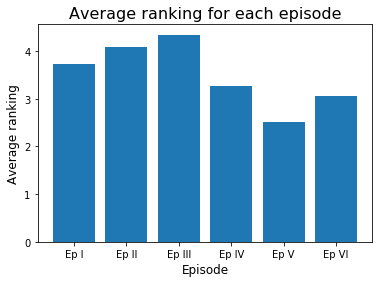

In [255]:
# Create a plot with these numbers
fig, ax = plt.subplots(figsize = (6,4))
plt.bar(('Ep I', 'Ep II', 'Ep III', 'Ep IV', 'Ep V', 'Ep VI'), the_rankings)
plt.title ('Average ranking for each episode', fontsize = 16)
plt.xlabel('Episode', fontsize = 12)
plt.ylabel('Average ranking', fontsize = 12)
plt.show()

So that appears to confirm what 538 stated. *Episode V: The Empire Strikes Back* is clearly the most favorite movie. (Remember: lower numbers means higher rankings.) And more in general, the first trilogy (episodes IV, V, VI) is more popular than the second trilogy (episodes I, II, III).

However, let's not jump into conclusions to fast. As the averages calculated may not be completely fair or accurate. Have a look at the sample below.

In [256]:
# Show a larger sample of the 'seen' and 'ranking' columns.
star_wars[seencolumns + rankingcolumns].head(80)

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
0,True,True,True,True,True,True,3.0,2.0,1.0,4.0,5.0,6.0
2,True,True,True,False,False,False,1.0,2.0,3.0,4.0,5.0,6.0
3,True,True,True,True,True,True,5.0,6.0,1.0,2.0,4.0,3.0
4,True,True,True,True,True,True,5.0,4.0,6.0,2.0,1.0,3.0
5,True,True,True,True,True,True,1.0,4.0,3.0,6.0,5.0,2.0
6,True,True,True,True,True,True,6.0,5.0,4.0,3.0,1.0,2.0
7,True,True,True,True,True,True,4.0,5.0,6.0,3.0,2.0,1.0
8,True,True,True,True,True,True,5.0,4.0,6.0,2.0,1.0,3.0
9,False,True,False,False,False,False,1.0,2.0,3.0,4.0,5.0,6.0
10,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN


The following can be observed:

* Many people reported that they only saw some of the movies. Still it appears that they ranked all six movies.
* People that saw a subset of the movies, in most cases used the best rankings for those. Example row 81: only saw episodes 5 and 6, and ranked those with 1 and 2.
* But not always. Example row 16: this person only so episode 4, and ranked it not with a 1 but with 3.
* There seem to be quite  a few records where the rankings are 1, 2, 3, 4, 5, 6 for episodes I - VI exactly in that sequence. Sure, it can be that this is exactly their rating. But given how many of such records there seem to be, one can argue that possibly these people just did not fill in their rankings properly.

Question is how to deal with this. One idea would be to set all rankings to NaN if someone did not see the movie. However this may also not be fair. Assuming that - mostly - people used rankings 1, 2 and 3 if they indeed only saw 3 movies, then that means that movies that were viewed by more people, automatically will get better rankings! Also we could ignore all rows where the rankings are 1...6 in sequence.

Let's do something simpler first. Let's take only those records we have where people watched all 6 movies, and check what the average rankings then look like. And compare that with our graph above.

In [257]:
# Add a column to indicate how many movies were seen
star_wars['seen_how_many'] = star_wars[seencolumns].sum(axis=1)

# Create a new dataframe only containing the records where that number is 6
star_wars_sawall = star_wars[star_wars['seen_how_many'] == 6]

# Check how many records we have left
star_wars_sawall.shape

(471, 39)

In [258]:
# Show a small sample to check if we did this correctly
star_wars_sawall[seencolumns + rankingcolumns].head(10)

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
0,True,True,True,True,True,True,3.0,2.0,1.0,4.0,5.0,6.0
3,True,True,True,True,True,True,5.0,6.0,1.0,2.0,4.0,3.0
4,True,True,True,True,True,True,5.0,4.0,6.0,2.0,1.0,3.0
5,True,True,True,True,True,True,1.0,4.0,3.0,6.0,5.0,2.0
6,True,True,True,True,True,True,6.0,5.0,4.0,3.0,1.0,2.0
7,True,True,True,True,True,True,4.0,5.0,6.0,3.0,2.0,1.0
8,True,True,True,True,True,True,5.0,4.0,6.0,2.0,1.0,3.0
12,True,True,True,True,True,True,3.0,4.0,5.0,6.0,1.0,2.0
13,True,True,True,True,True,True,4.0,5.0,6.0,2.0,3.0,1.0
14,True,True,True,True,True,True,4.0,2.0,5.0,3.0,1.0,6.0


So it seems we 471 people who saw all movies, approximately half of our dataset. Let's now calculate averages for this subset.

In [259]:
# Calculate the average ranking of each episode (for those who saw all episodes)
the_rankings_sawall = star_wars_sawall[rankingcolumns].mean()

In [260]:
# List the rankings of all episodes (for those who saw all episodes)
the_rankings_sawall

ranking_1    4.237792
ranking_2    4.326964
ranking_3    4.253191
ranking_4    2.866242
ranking_5    2.380042
ranking_6    2.932059
dtype: float64

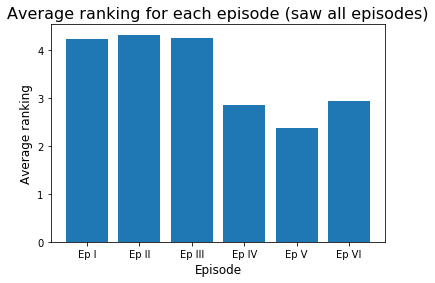

In [261]:
# Create a plot with these numbers
fig, ax = plt.subplots(figsize = (6,4))
plt.bar(('Ep I', 'Ep II', 'Ep III', 'Ep IV', 'Ep V', 'Ep VI'), the_rankings_sawall)
plt.title ('Average ranking for each episode (saw all episodes)', fontsize = 16)
plt.xlabel('Episode', fontsize = 12)
plt.ylabel('Average ranking', fontsize = 12)
plt.show()

What we can see is that while the numbers changed, the pattern (and with that: the conclusion) is still the same:
* The first trilogy (episodes IV, V, VI) is more popular than the second trilogy.
* And *Episode V: The Empire Strikes Back* is the most popular of the entire bunch.

Given that the conclusion remained the same as above (when we challenged this), there doesn't seem to be a case to do more complex operations, like assessing how to deal with rankings of people who only saw part of the movies but still ranked all six of them.

### Which episodes were seen most 

Now let us explore which episodes were actually seen most. 
Remember the order of appearance was: IV, V, VI, then I, II, III.

In [262]:
# Calculate how much each movie was seen
how_much_seen = star_wars[seencolumns].sum()

In [263]:
# List the how many people saw each episodes
how_much_seen

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

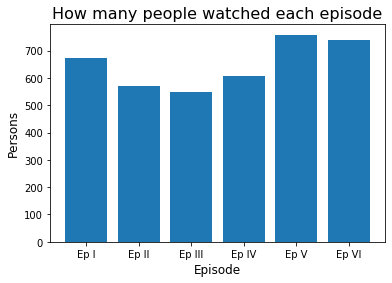

In [264]:
# Create a plot with these numbers
fig, ax = plt.subplots(figsize = (6,4))
plt.bar(('Ep I', 'Ep II', 'Ep III', 'Ep IV', 'Ep V', 'Ep VI'), how_much_seen)
plt.title ('How many people watched each episode', fontsize = 16)
plt.xlabel('Episode', fontsize = 12)
plt.ylabel('Persons', fontsize = 12)
plt.show()

What we see that episode V is not only the most popular one in terms of ranking, but also the one that has been seen most. Followed by episode VI, also both for ranking and number of people who watched.

It seems that the first trilogy (episodes IV, V, VI) are most popular. 

### Gender differences

The data also contains a column 'Gender' indicating whether the respondent was male or female. That enables us to explore whether for the observations that we just did, there are a differences between the two genders.

In [265]:
# Check values in gender column
star_wars['Gender'].value_counts(dropna=False)

Male      423
Female    397
NaN       116
Name: Gender, dtype: int64

Quite a few records without gender actually ('NaN'), but still sufficient records left to base our analysis on. (We will ignore the records where no Gender is known). The data is clean (only 'Male' and 'Female'), so we can use that straightaway to split our data into two groups.

In [266]:
# Calculate the average ranking of each movie per gender
rankings_male = star_wars[star_wars["Gender"] == "Male"][rankingcolumns].mean()
rankings_female = star_wars[star_wars["Gender"] == "Female"][rankingcolumns].mean()

In [267]:
# List the rankings of all episodes - men
rankings_male

ranking_1    4.037825
ranking_2    4.224586
ranking_3    4.274882
ranking_4    2.997636
ranking_5    2.458629
ranking_6    3.002364
dtype: float64

In [268]:
# List the rankings of all episodes - women
rankings_female

ranking_1    3.429293
ranking_2    3.954660
ranking_3    4.418136
ranking_4    3.544081
ranking_5    2.569270
ranking_6    3.078086
dtype: float64

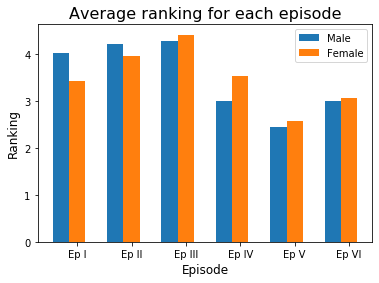

In [269]:
# Create a plot with these numbers
fig, ax = plt.subplots(figsize = (6,4))

plt.title ('Average ranking for each episode', fontsize = 16)

barwidth = 0.3
plt.bar(np.arange(len(rankings_male)), rankings_male, width=barwidth, label = 'Male')
plt.bar(np.arange(len(rankings_female))+ barwidth, rankings_female, width=barwidth, label = 'Female')

plt.xticks([r + barwidth for r in range(len(rankings_male))],
        ['Ep I', 'Ep II', 'Ep III', 'Ep IV', 'Ep V', 'Ep VI'])

plt.xlabel('Episode', fontsize = 12)
plt.ylabel('Ranking', fontsize = 12)

plt.legend()
plt.show()

So what we see is that both males and females like Episodes IV, V and VI most. However, men seem to be more outspoken about that than females

In [270]:
# Calculate how much each movie was seen per gender
how_much_seen_male = star_wars[star_wars["Gender"] == "Male"][seencolumns].sum()
how_much_seen_female = star_wars[star_wars["Gender"] == "Female"][seencolumns].sum()

In [271]:
# List the how many people saw each episodes - men
how_much_seen_male

seen_1    361
seen_2    323
seen_3    317
seen_4    342
seen_5    392
seen_6    387
dtype: int64

In [272]:
# List the how many people saw each episodes - women
how_much_seen_female

seen_1    298
seen_2    237
seen_3    222
seen_4    255
seen_5    353
seen_6    338
dtype: int64

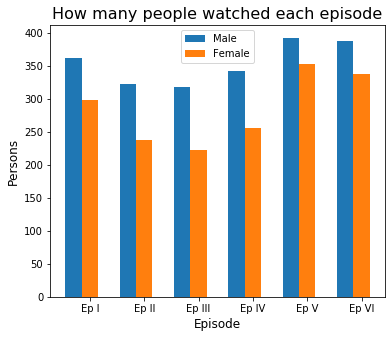

In [273]:
# Create a plot with these numbers
fig, ax = plt.subplots(figsize = (6,5))

plt.title ('How many people watched each episode', fontsize = 16)

barwidth = 0.3
plt.bar(np.arange(len(how_much_seen_male)), how_much_seen_male, width=barwidth, label = 'Male')
plt.bar(np.arange(len(how_much_seen_female))+ barwidth, how_much_seen_female, width=barwidth, label = 'Female')

plt.xticks([r + barwidth for r in range(len(how_much_seen_male))],
        ['Ep I', 'Ep II', 'Ep III', 'Ep IV', 'Ep V', 'Ep VI'])

plt.xlabel('Episode', fontsize = 12)
plt.ylabel('Persons', fontsize = 12)

plt.legend()
plt.show()

All episodes were watched more by men then women. (Actually, there were simply more male survey respondents, but without having done the math, it seems that that does not account for this difference: men just watched more episodes.) The relative difference seems to have increased over time for the more recently released episodes (I, II, III).

## Summary of observations

Based on the approximately one thousands responses to 538's survey, the main observations are:
* The most popular episode is *Episode V: The empire strikes back*. It was watched most *and* on average ranked as best.
* The first trilogy (episodes IV, V, VI) is generally more popular that the second trilogy (episodes I, II, III)
* These observations apply both men and women alike, although men seem to be more outspoken about their favorite episodes
